# Data Exploration

# Testing

In [2]:
# imports
import requests
import pandas as pd
from matplotlib import pyplot as plt
import datetime

## Getting Data

In [2]:
date = datetime.datetime.strptime('2020-09-01', '%Y-%m-%d').date()
test = []
while date < datetime.datetime.now().date():
    d = date.strftime('%Y-%m-%d')
    print(d)
    try:
        test.append(pd.read_csv(f'https://archive.sensor.community/{d}/{d}_sds011_sensor_6842.csv', sep = ';'))
    except:
        print("\tdoes not exist jet")
    date += datetime.timedelta(days = 1)

2020-09-01
2020-09-02
2020-09-03
2020-09-04
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09


In [3]:
comp = test[0]
for i in range(1, len(test)):
    comp = pd.concat([comp, test[i]], axis = 0)
del test

In [4]:
comp

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2
0,6842,SDS011,3460,52.028,8.916,2020-09-01T00:00:51,5.30,NaN,NaN,1.77,NaN,NaN
1,6842,SDS011,3460,52.028,8.916,2020-09-01T00:03:23,8.00,NaN,NaN,1.83,NaN,NaN
2,6842,SDS011,3460,52.028,8.916,2020-09-01T00:05:59,3.43,NaN,NaN,1.70,NaN,NaN
3,6842,SDS011,3460,52.028,8.916,2020-09-01T00:08:29,5.40,NaN,NaN,2.00,NaN,NaN
4,6842,SDS011,3460,52.028,8.916,2020-09-01T00:11:00,9.23,NaN,NaN,2.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
584,6842,SDS011,3460,52.028,8.916,2020-09-09T23:48:42,7.73,NaN,NaN,1.53,NaN,NaN
585,6842,SDS011,3460,52.028,8.916,2020-09-09T23:51:08,9.43,NaN,NaN,2.20,NaN,NaN
586,6842,SDS011,3460,52.028,8.916,2020-09-09T23:53:35,7.10,NaN,NaN,1.77,NaN,NaN
587,6842,SDS011,3460,52.028,8.916,2020-09-09T23:56:01,5.67,NaN,NaN,1.70,NaN,NaN


In [5]:
comp.describe()

,sensor_id,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
count,5172.0,5172.0,5.172000e+03,5.172000e+03,5172.000000,0.0,0.0,5172.000000,0.0,0.0
mean,6842.0,3460.0,5.202800e+01,8.916000e+00,8.495226,NaN,NaN,5.325102,NaN,NaN
std,0.0,0.0,1.421223e-14,1.776529e-15,9.130687,NaN,NaN,6.416699,NaN,NaN
min,6842.0,3460.0,5.202800e+01,8.916000e+00,0.500000,NaN,NaN,0.400000,NaN,NaN
25%,6842.0,3460.0,5.202800e+01,8.916000e+00,4.070000,NaN,NaN,1.970000,NaN,NaN
50%,6842.0,3460.0,5.202800e+01,8.916000e+00,6.125000,NaN,NaN,3.300000,NaN,NaN
75%,6842.0,3460.0,5.202800e+01,8.916000e+00,9.730000,NaN,NaN,6.000000,NaN,NaN
max,6842.0,3460.0,5.202800e+01,8.916000e+00,351.570000,NaN,NaN,213.230000,NaN,NaN


In [6]:
comp['timestamp'] = pd.to_datetime(comp['timestamp'])
comp = comp.set_index('timestamp')

In [7]:
comp

,sensor_id,sensor_type,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
timestamp,,,,,,,,,,,
2020-09-01 00:00:51,6842,SDS011,3460,52.028,8.916,5.30,NaN,NaN,1.77,NaN,NaN
2020-09-01 00:03:23,6842,SDS011,3460,52.028,8.916,8.00,NaN,NaN,1.83,NaN,NaN
2020-09-01 00:05:59,6842,SDS011,3460,52.028,8.916,3.43,NaN,NaN,1.70,NaN,NaN
2020-09-01 00:08:29,6842,SDS011,3460,52.028,8.916,5.40,NaN,NaN,2.00,NaN,NaN
2020-09-01 00:11:00,6842,SDS011,3460,52.028,8.916,9.23,NaN,NaN,2.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-09 23:48:42,6842,SDS011,3460,52.028,8.916,7.73,NaN,NaN,1.53,NaN,NaN
2020-09-09 23:51:08,6842,SDS011,3460,52.028,8.916,9.43,NaN,NaN,2.20,NaN,NaN
2020-09-09 23:53:35,6842,SDS011,3460,52.028,8.916,7.10,NaN,NaN,1.77,NaN,NaN


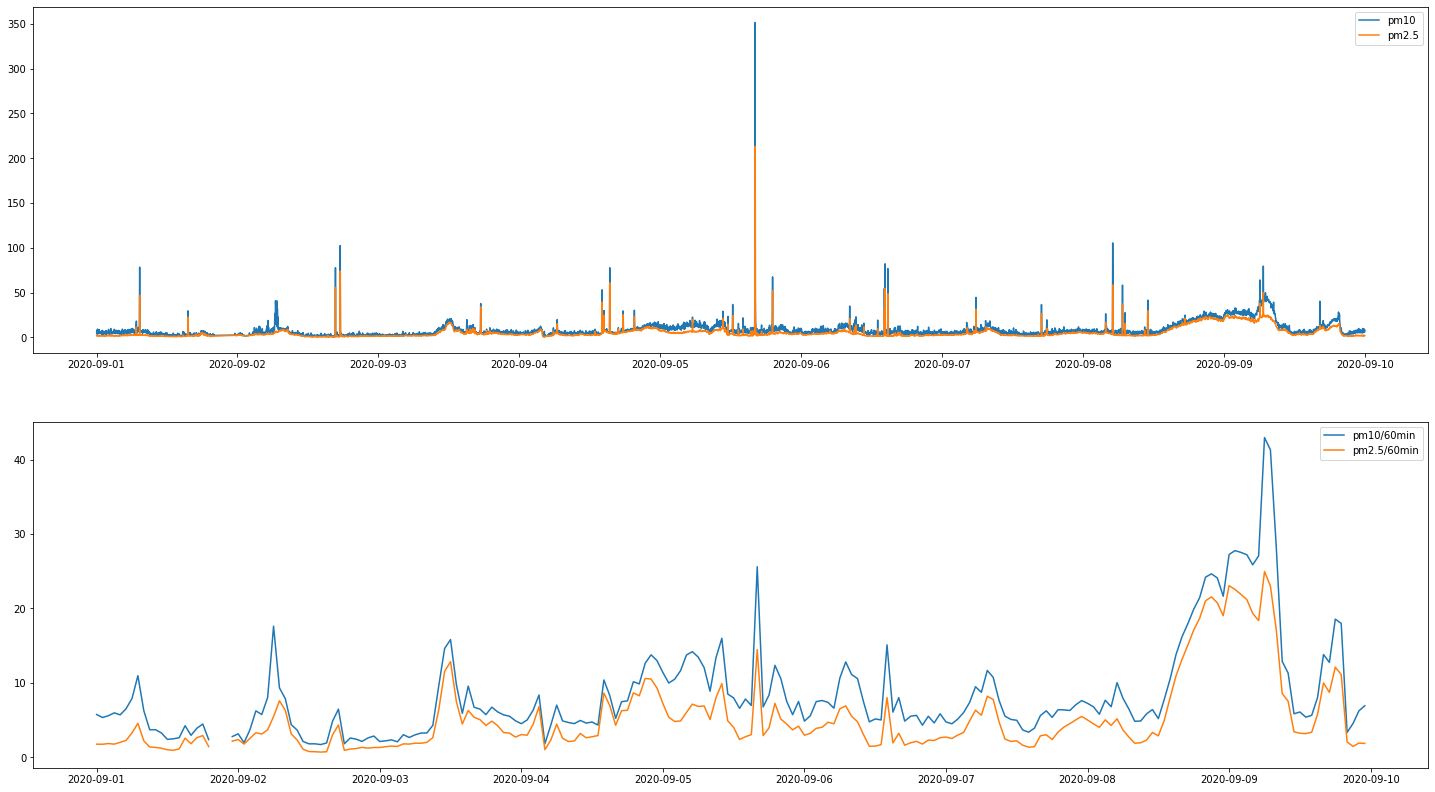

In [8]:
plt.figure(figsize = [25, 14])

plt.subplot(211)
plt.plot(comp['P1'], '-', label = 'pm10')
plt.plot(comp['P2'], '-', label = 'pm2.5')
plt.legend()


resampleTime = 60
comp2 = comp.resample(f'{resampleTime}min').mean()
plt.subplot(212)
plt.plot(comp2['P1'], '-', label = f'pm10/{resampleTime}min')
plt.plot(comp2['P2'], '-', label = f'pm2.5/{resampleTime}min')
plt.legend()

plt.show()

## Multiple Sensors

In [9]:
def get_sensor_data(SensorList):  
    SensorData = {}
    for sensor in SensorList:
        print(sensor)
        date = datetime.datetime.strptime('2020-09-05', '%Y-%m-%d').date()
        test = []
        comp = []
        while date < datetime.datetime.now().date():
            d = date.strftime('%Y-%m-%d')
            print(d)
            try:
                test.append(pd.read_csv(f'https://archive.sensor.community/{d}/{d}_sds011_sensor_{sensor}.csv', sep = ';'))
            except:
                print("\tdoes not exist jet")
                break
            date += datetime.timedelta(days = 1)
        try:
            comp = test[0]
            for i in range(1, len(test)):
                comp = pd.concat([comp, test[i]], axis = 0)
            comp['timestamp'] = pd.to_datetime(comp['timestamp'])
            comp = comp.set_index('timestamp')
        except:
            print("\tno data")
        SensorData[sensor] = comp
    return SensorData

In [10]:
SensorList = [line.rstrip('\n') for line in open("SensorList.txt")]
SensorData = get_sensor_data(SensorList[-5:])

11224
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09
9547
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09
564
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09
31035
2020-09-05
	does not exist jet
	no data
4857
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09


In [11]:
SensorData['4857']

,sensor_id,sensor_type,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
timestamp,,,,,,,,,,,
2020-09-05 00:04:27,4857,SDS011,2443,51.978,8.472,10.15,NaN,NaN,5.28,NaN,NaN
2020-09-05 00:09:23,4857,SDS011,2443,51.978,8.472,9.30,NaN,NaN,4.62,NaN,NaN
2020-09-05 00:14:20,4857,SDS011,2443,51.978,8.472,9.57,NaN,NaN,5.18,NaN,NaN
2020-09-05 00:19:16,4857,SDS011,2443,51.978,8.472,7.35,NaN,NaN,4.32,NaN,NaN
2020-09-05 00:24:12,4857,SDS011,2443,51.978,8.472,4.95,NaN,NaN,4.45,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-09 23:37:37,4857,SDS011,2443,51.978,8.472,10.52,NaN,NaN,3.05,NaN,NaN
2020-09-09 23:42:34,4857,SDS011,2443,51.978,8.472,13.17,NaN,NaN,4.37,NaN,NaN
2020-09-09 23:47:30,4857,SDS011,2443,51.978,8.472,9.13,NaN,NaN,2.83,NaN,NaN


## Getting a list of all sensors located in OWL

In [109]:
url = 'http://api.luftdaten.info/static/v1/data.json'
r = requests.get(url)
rdata = r.json()
df = pd.DataFrame(rdata)

In [110]:
df

,id,sampling_rate,timestamp,location,sensor,sensordatavalues
0,1863030348,NaN,2020-09-13 16:49:02,"{'id': 19623, 'latitude': '52.482', 'longitude...","{'id': 33254, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4019546022, 'value': '6.28', 'value_ty..."
1,1863030345,NaN,2020-09-13 16:49:02,"{'id': 11497, 'latitude': '52.222', 'longitude...","{'id': 22662, 'pin': '11', 'sensor_type': {'id...","[{'id': 4019546021, 'value': '18.12', 'value_t..."
2,1863030343,NaN,2020-09-13 16:49:02,"{'id': 11154, 'latitude': '48.558', 'longitude...","{'id': 21980, 'pin': '11', 'sensor_type': {'id...","[{'id': 4019546016, 'value': '26.44', 'value_t..."
3,1863030342,NaN,2020-09-13 16:49:02,"{'id': 2420, 'latitude': '51.202', 'longitude'...","{'id': 4813, 'pin': '7', 'sensor_type': {'id':...","[{'id': 4019546015, 'value': '22.70', 'value_t..."
4,1863030341,NaN,2020-09-13 16:49:02,"{'id': 15704, 'latitude': '48.834', 'longitude...","{'id': 28484, 'pin': '7', 'sensor_type': {'id'...","[{'id': 4019546009, 'value': '25.80', 'value_t..."
...,...,...,...,...,...,...
47257,1862982849,NaN,2020-09-13 16:43:53,"{'id': 10218, 'latitude': '42.874', 'longitude...","{'id': 20114, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4019443044, 'value': '122.30', 'value_..."
47258,1862982848,NaN,2020-09-13 16:43:53,"{'id': 2672, 'latitude': '42.67', 'longitude':...","{'id': 5299, 'pin': '1', 'sensor_type': {'id':...","[{'id': 4019443042, 'value': '5.07', 'value_ty..."
47259,1862982847,NaN,2020-09-13 16:43:53,"{'id': 28612, 'latitude': '51.75435895709', 'l...","{'id': 37286, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4019443040, 'value': '4.07', 'value_ty..."
47260,1862982846,NaN,2020-09-13 16:43:53,"{'id': 24102, 'latitude': '50.81584953791', 'l...","{'id': 38300, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4019443038, 'value': '6.32', 'value_ty..."


In [111]:
# longitudes
northPoint = 8.3255
southPoint = 9.5537

# latitudes
westPoint = 52.2396
eastPoint = 51.4762

In [112]:
for i in range(10):
    print('location: ' + str(df.location[i]))
    print('sensor: ' + str(df.sensor[i]))
    print('senosrdatavalues: ' + str(df.sensordatavalues[i]))
    print()

location: {'id': 19623, 'latitude': '52.482', 'longitude': '9.762', 'altitude': '48.5', 'country': 'DE', 'exact_location': 0, 'indoor': 0}
sensor: {'id': 33254, 'pin': '1', 'sensor_type': {'id': 14, 'name': 'SDS011', 'manufacturer': 'Nova Fitness'}}
senosrdatavalues: [{'id': 4019546022, 'value': '6.28', 'value_type': 'P1'}, {'id': 4019546024, 'value': '2.90', 'value_type': 'P2'}]

location: {'id': 11497, 'latitude': '52.222', 'longitude': '21.246', 'altitude': '101.5', 'country': 'PL', 'exact_location': 0, 'indoor': 0}
sensor: {'id': 22662, 'pin': '11', 'sensor_type': {'id': 17, 'name': 'BME280', 'manufacturer': 'Bosch'}}
senosrdatavalues: [{'id': 4019546021, 'value': '18.12', 'value_type': 'temperature'}, {'id': 4019546023, 'value': '101325.16', 'value_type': 'pressure'}, {'value': 102537.06, 'value_type': 'pressure_at_sealevel'}]

location: {'id': 11154, 'latitude': '48.558', 'longitude': '9.234', 'altitude': '360.5', 'country': 'DE', 'exact_location': 0, 'indoor': 0}
sensor: {'id': 

In [113]:
df = df[df['location'].map(lambda x: 'DE' in x.values())]

In [114]:
bla = df[df['sensor'].map(lambda x: 'SDS011' in x['sensor_type'].values())]

In [115]:
bla.shape

(11829, 6)

In [116]:
df.shape

(23035, 6)

In [117]:
longitude = bla['location'].apply(lambda x: x.get('longitude'))
latitude = bla['location'].apply(lambda x: x.get('latitude'))

In [118]:
bla = bla.assign(longitude = longitude.values)
bla = bla.assign(latitude = latitude.values)

In [119]:
bla

,id,sampling_rate,timestamp,location,sensor,sensordatavalues,longitude,latitude
0,1863030348,NaN,2020-09-13 16:49:02,"{'id': 19623, 'latitude': '52.482', 'longitude...","{'id': 33254, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4019546022, 'value': '6.28', 'value_ty...",9.762,52.482
6,1863030339,NaN,2020-09-13 16:49:02,"{'id': 23656, 'latitude': '53.606', 'longitude...","{'id': 37815, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4019546005, 'value': '0.00', 'value_ty...",10.006,53.606
7,1863030338,NaN,2020-09-13 16:49:02,"{'id': 4989, 'latitude': '48.772', 'longitude'...","{'id': 9900, 'pin': '1', 'sensor_type': {'id':...","[{'id': 4019546000, 'value': '25.07', 'value_t...",9.154,48.772
9,1863030335,NaN,2020-09-13 16:49:02,"{'id': 6701, 'latitude': '51.98', 'longitude':...","{'id': 13265, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4019545998, 'value': '10.03', 'value_t...",7.65,51.98
11,1863030333,NaN,2020-09-13 16:49:02,"{'id': 32511, 'latitude': '50.686', 'longitude...","{'id': 40503, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4019545979, 'value': '34.10', 'value_t...",10.924,50.686
...,...,...,...,...,...,...,...,...
47240,1862982866,NaN,2020-09-13 16:43:53,"{'id': 13431, 'latitude': '51.352', 'longitude...","{'id': 25535, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4019443083, 'value': '6.93', 'value_ty...",6.412,51.352
47247,1862982859,NaN,2020-09-13 16:43:53,"{'id': 23239, 'latitude': '51.504', 'longitude...","{'id': 37365, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4019443066, 'value': '3', 'value_type'...",7.456,51.504
47249,1862982857,NaN,2020-09-13 16:43:53,"{'id': 32205, 'latitude': '48.816', 'longitude...","{'id': 46375, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4019443061, 'value': '3.93', 'value_ty...",9.802,48.816
47256,1862982850,NaN,2020-09-13 16:43:53,"{'id': 13110, 'latitude': '50.08296170000', 'l...","{'id': 25133, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4019443046, 'value': '8.63', 'value_ty...",8.27718900000,50.08296170000


In [120]:
bla.drop('location', axis = 1)

,id,sampling_rate,timestamp,sensor,sensordatavalues,longitude,latitude
0,1863030348,NaN,2020-09-13 16:49:02,"{'id': 33254, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4019546022, 'value': '6.28', 'value_ty...",9.762,52.482
6,1863030339,NaN,2020-09-13 16:49:02,"{'id': 37815, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4019546005, 'value': '0.00', 'value_ty...",10.006,53.606
7,1863030338,NaN,2020-09-13 16:49:02,"{'id': 9900, 'pin': '1', 'sensor_type': {'id':...","[{'id': 4019546000, 'value': '25.07', 'value_t...",9.154,48.772
9,1863030335,NaN,2020-09-13 16:49:02,"{'id': 13265, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4019545998, 'value': '10.03', 'value_t...",7.65,51.98
11,1863030333,NaN,2020-09-13 16:49:02,"{'id': 40503, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4019545979, 'value': '34.10', 'value_t...",10.924,50.686
...,...,...,...,...,...,...,...
47240,1862982866,NaN,2020-09-13 16:43:53,"{'id': 25535, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4019443083, 'value': '6.93', 'value_ty...",6.412,51.352
47247,1862982859,NaN,2020-09-13 16:43:53,"{'id': 37365, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4019443066, 'value': '3', 'value_type'...",7.456,51.504
47249,1862982857,NaN,2020-09-13 16:43:53,"{'id': 46375, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4019443061, 'value': '3.93', 'value_ty...",9.802,48.816
47256,1862982850,NaN,2020-09-13 16:43:53,"{'id': 25133, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4019443046, 'value': '8.63', 'value_ty...",8.27718900000,50.08296170000


In [121]:
bla['longitude'] = pd.to_numeric(bla.longitude)

In [122]:
bla['latitude'] = pd.to_numeric(bla.latitude)

In [123]:
bla = bla[bla.longitude >= northPoint]
bla = bla[bla.longitude <= southPoint]
bla = bla[bla.latitude <= westPoint]
bla = bla[bla.latitude >= eastPoint]

In [124]:
bla

,id,sampling_rate,timestamp,location,sensor,sensordatavalues,longitude,latitude
449,1863029890,NaN,2020-09-13 16:49:00,"{'id': 30545, 'latitude': '52.024', 'longitude...","{'id': 33026, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4019545067, 'value': '5.35', 'value_ty...",8.524000,52.024000
613,1863029723,NaN,2020-09-13 16:48:59,"{'id': 18464, 'latitude': '51.77698775000', 'l...","{'id': 31922, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4019544707, 'value': '1.90', 'value_ty...",8.817553,51.776988
820,1863029516,NaN,2020-09-13 16:48:58,"{'id': 2791, 'latitude': '51.776', 'longitude'...","{'id': 5537, 'pin': '1', 'sensor_type': {'id':...","[{'id': 4019544265, 'value': '2.73', 'value_ty...",8.820000,51.776000
1385,1863028949,NaN,2020-09-13 16:48:55,"{'id': 13299, 'latitude': '52.052', 'longitude...","{'id': 25343, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4019543050, 'value': '621.28', 'value_...",8.548000,52.052000
1717,1863028616,NaN,2020-09-13 16:48:53,"{'id': 14000, 'latitude': '52.056', 'longitude...","{'id': 26277, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4019542338, 'value': '11.63', 'value_t...",8.510000,52.056000
...,...,...,...,...,...,...,...,...
46287,1862983824,NaN,2020-09-13 16:44:00,"{'id': 2630, 'latitude': '52.036', 'longitude'...","{'id': 5221, 'pin': '1', 'sensor_type': {'id':...","[{'id': 4019445164, 'value': '74.00', 'value_t...",8.514000,52.036000
46523,1862983586,NaN,2020-09-13 16:43:58,"{'id': 16399, 'latitude': '51.686', 'longitude...","{'id': 29422, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4019444649, 'value': '8.53', 'value_ty...",8.684000,51.686000
46530,1862983579,NaN,2020-09-13 16:43:58,"{'id': 10660, 'latitude': '51.712', 'longitude...","{'id': 21004, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4019444634, 'value': '337.25', 'value_...",8.754000,51.712000
46671,1862983438,NaN,2020-09-13 16:43:57,"{'id': 5543, 'latitude': '51.734', 'longitude'...","{'id': 10979, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4019444328, 'value': '1.70', 'value_ty...",8.744000,51.734000
